This is where I will be writing up the code for my final project.

C:\Users\chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
C:\Users\chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


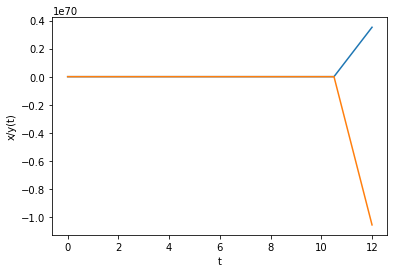

In [43]:
import numpy as np
import matplotlib.pyplot as plt
#constants/scalars
alpha = 1
beta = .5
gamma = 1.5
delta = 2


#the lotka-volterra equations



# def prey(x, y, t):
#     '''Calculates a differential function that will model the rate of growth and decay of the prey.
    
#     Accepts:
#         x: represents the population of prey - float
#         y: represents the population of the predator - float
#         t: represents time - float
#     returns the ODE:  (a*x) - (b*x*y) 
#     '''
#         return (a*x) - (b*x*y) 
# def pred(x, y, t):
#       '''Calculates a differential function that will model the rate of growth and decay of the predator.
    
#     Accepts:
#         x: represents the population of prey - float
#         y: represents the population of the predator - float
#         t: represents time - float
#     returns the ODE: (c*x*y) - (d*y)
#     '''
#         return  (c*x*y) - (d*y)
# def RK4( )

def pp(r,t):
    '''Calculates two ODEs that encapsules both the predator and prey models into one variable r
    
    accepts:
        r: represents a type of array that can be spliced and turned into multiple equations
        t: represents
    pred: ODE modeling the predator population as it changes with respect to the prey's population 
            and time
    prey: represents the ODE modeling the prey population as it changes in time predator's population
            and time 
    returns array([fprey, fpred], float)'''
    prey = r[0]
    pred = r[1]
    fprey = (alpha*prey) - (beta*prey*pred)
    fpred = (gamma*prey*pred) - (delta*pred)
    return np.array([fprey, fpred], float)
    
def RK4(f, a, b, N):
    '''calculates the solution of the input function using the fourth order runge-kutta solving method
    accepts: 
        f - function that returns an array
        a - initial 
        b - final 
        N - steps
    xpoints represents the population of prey
    ypoints represents the population of predators
        returns 
    '''
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    ypoints = []
    
    r = np.array([1.0,1.0],float)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+ 2*k2 + 2*k3 +k4)/6
    plt.plot(tpoints,xpoints)
    plt.plot(tpoints,ypoints)
    plt.xlabel("t")
    plt.ylabel("x/y(t)")
    plt.show()
RK4(pp, 0, 30, 20)

This code seems to work well with a certain combination of scalars and runs into issues with other combinations of scalars. The issue I'm running into right now is an overflow due to double scalars, and that occurs when I'm using the  